In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt

In [2]:
fname = '../data/reviews_Movies_and_TV_5.json.gz'

In [3]:
def parse(path):
    """parsing gzip file"""
    g = gzip.open(path, 'rb')
    for line in g:
        yield eval(line)

In [4]:
def get_df(path):
    """creating pandas.dataframe from json.gz file"""
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [5]:
df = get_df(fname)

In [6]:
# selecting columns of interest
df = df[['reviewText', 'summary', 'overall']]

In [7]:
# renaming the columns
df.columns = ['review', 'summary', 'target']

In [8]:
# converting type of target from flow to int
df.loc[:, 'target'] = df['target'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697533 entries, 0 to 1697532
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   review   object
 1   summary  object
 2   target   int64 
dtypes: int64(1), object(2)
memory usage: 51.8+ MB


In [10]:
df.tail()

,review,summary,target
1697528,wow $269.99 for the entire series on Blu Ray??...,Way to Expensive!! WB = GREED,1
1697529,"Finally, the holy grail of tv-on-dvd boxsets i...","HOLY BAT-BOXSET, BATMAN... I never thought thi...",5
1697530,Could this be a true or I'm i dreaming batman ...,prayers have been answered because batman 60s ...,5
1697531,I've been a fan of the series since I was a yo...,can't Wait!,5
1697532,People seriously need to wake up and realize t...,The Price is Insane? People Really Need to Wak...,5


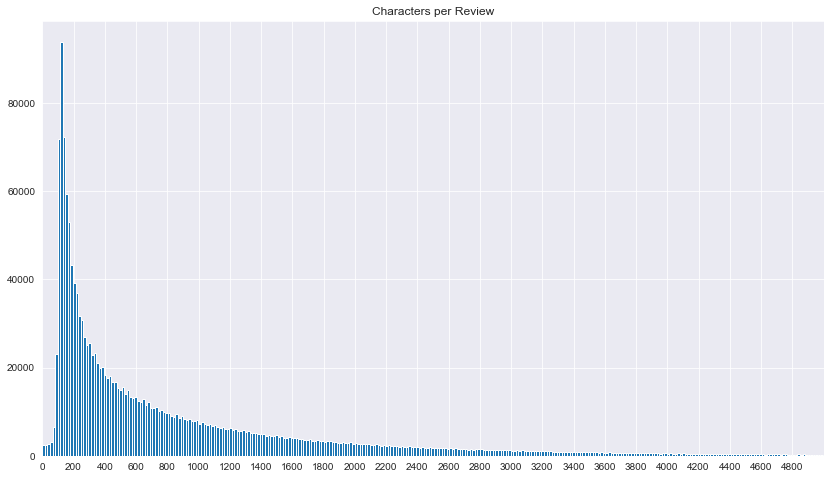

In [11]:
# looking at the distribution of the number of characters per review
fig = plt.figure(2, figsize=(14, 8))
df['review'].str.len().hist(bins=2000)
plt.xlim(0, 5000)
plt.title('Characters per Review')
plt.xticks(list(range(0, 5000, 200)))
plt.show()

In [12]:
# choosing reviews with equal or less than 280 characters per review because it's the cap on Twitter
df = df[(df['review'].str.len() <= 280)]

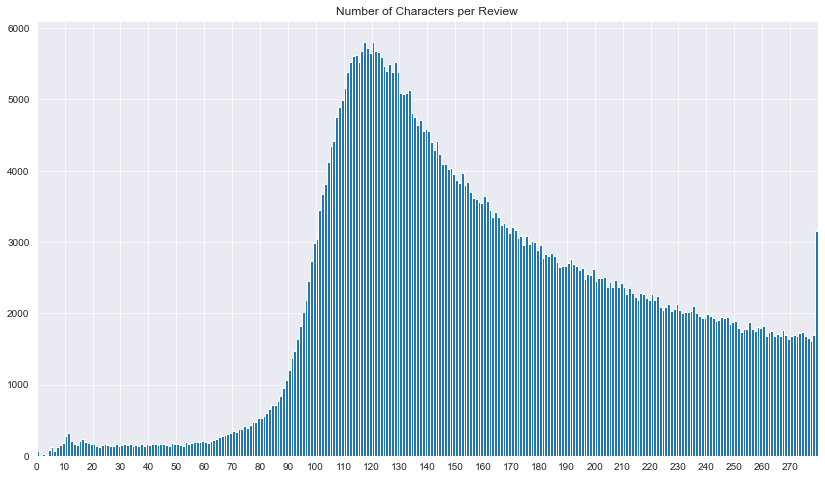

In [13]:
# checking the number of characters per review after filtering through dataframe
fig = plt.figure(2, figsize=(14, 8))
df['review'].str.len().hist(bins=280)
plt.xlim(0, 280)
plt.title('Number of Characters per Review')
plt.xticks(list(range(0, 280, 10)))
plt.show()

In [14]:
# checking the class balance
df['target'].value_counts().sort_values()

2     22690
1     28854
3     52187
4    110204
5    388919
Name: target, dtype: int64

In [15]:
df.head()

,review,summary,target
1,It was good but not as emotionally moving as t...,Good but not as moving,3
2,"Don't get me wrong, Winkler is a wonderful cha...",Winkler's Performance was ok at best!,3
3,Henry Winkler is very good in this twist on th...,It's an enjoyable twist on the classic story,5
4,This is one of the best Scrooge movies out. H...,Best Scrooge yet,4
5,This has been a favorite movie of mine for a l...,Dickens updated.,5


In [16]:
# selecting 50k reviews from each class
df = df.groupby(by='target', as_index=False).apply(lambda x: x.sample(min(50_000, len(x))))

In [17]:
# resetting index
df = df.reset_index().drop(['level_0', 'level_1'], axis=1)

In [18]:
# shuffling
df = df.sample(frac=1)

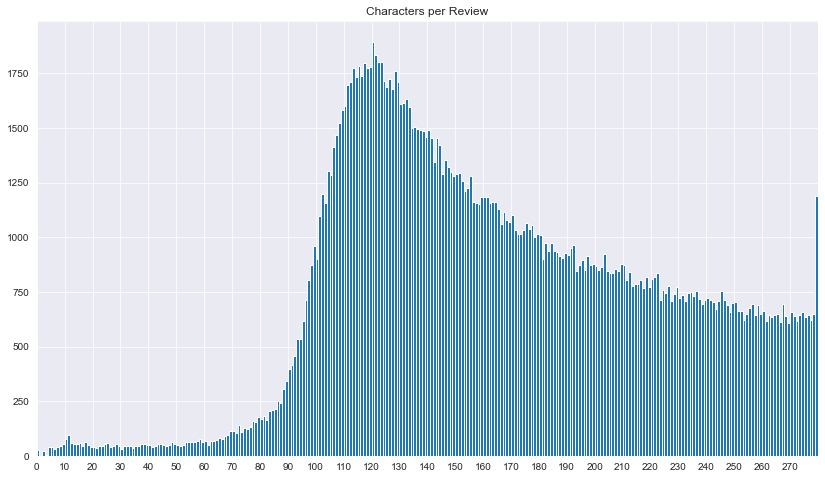

In [19]:
# looking at the distribution of the number of characters per review after resampling
fig = plt.figure(2, figsize=(14, 8))
df['review'].str.len().hist(bins=280)
plt.xlim(0, 280)
plt.title('Characters per Review')
plt.xticks(list(range(0, 280, 10)))
plt.show()

In [22]:
# checking class balance after resampling
df.target.value_counts().sort_values()

2    22690
1    28854
4    50000
3    50000
5    50000
Name: target, dtype: int64

In [23]:
# saving selected data
df.to_csv('../data/amzn_selected_data.csv', index=False)